## Objective: Analyze the customer purchasing patterns and product relationships to optimize inventory management, improve store layout, and enhance marketing strategies. Our analysis will be focused on identifying frequently purchased items, understanding product associations, and customer behavior of purchasing products.

# Import libraries

In [ ]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mlxtend
!pip install statsmodels


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [3]:
# Read dataset, added header rows to dataset
Column_names= ['Date', 'Transaction ID', 'Product']
df=pd.read_csv('https://raw.githubusercontent.com/jhonnovax/Random-Shopping-Cart-Analysis/main/data.csv', header=None, names=Column_names, on_bad_lines='skip')
df


,Date,Transaction ID,Product
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [ ]:
# Inspect the data. Check dataset dimensions -columns and rows
df.shape

(22343, 3)

In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22343 entries, 0 to 22342
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            22343 non-null  object
 1   Transaction ID  22343 non-null  int64 
 2   Product         22343 non-null  object
dtypes: int64(1), object(2)
memory usage: 523.8+ KB


# Exploratory Data Analysis

## Check data types

In [ ]:
# Check unique values. This provides more insights and helps us identity the Number of Products (38) in scope, Number of transactions and time
# period.
df.nunique()

Date               603
Transaction ID    1139
Product             38
dtype: int64

In [ ]:
#Transform features - changing Data types.
# Converting the data types of columns - changing Date data type from object to Date format to enable analysis
# Check data types after converting
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Date              datetime64[ns]
Transaction ID             int64
Product                   object
dtype: object

## Check data mistakes

In [ ]:
# Check product list and detect duplicated values or misspelling sorted in alphabetical order
df['Product'].value_counts().sort_index()

Product
all- purpose                     551
aluminum foil                    566
bagels                           573
beef                             561
butter                           555
cereals                          591
cheeses                          578
coffee/tea                       565
dinner rolls                     567
dishwashing liquid/detergent     551
eggs                             570
flour                            555
fruits                           529
hand soap                        502
ice cream                        579
individual meals                 544
juice                            570
ketchup                          548
laundry detergent                542
lunch meat                       573
milk                             555
mixes                            554
paper towels                     556
pasta                            542
pork                             531
poultry                          640
sandwich bags                 

## Check missing values

In [ ]:
# Inspect the data. Checking for Null values
df.isnull().sum()

Date              0
Transaction ID    0
Product           0
dtype: int64

## Statistics summary

In [ ]:
# Statistics summary
df.describe()

,Date,Transaction ID
count,22343,22343.000000
mean,2000-12-21 19:06:56.828536960,576.412612
min,2000-01-01 00:00:00,1.000000
25%,2000-05-29 00:00:00,292.000000
50%,2001-01-30 00:00:00,582.000000
75%,2001-06-21 00:00:00,863.000000
max,2002-02-26 00:00:00,1139.000000
std,NaN,328.449918


## Inventory Analysis to show trends

<Axes: >

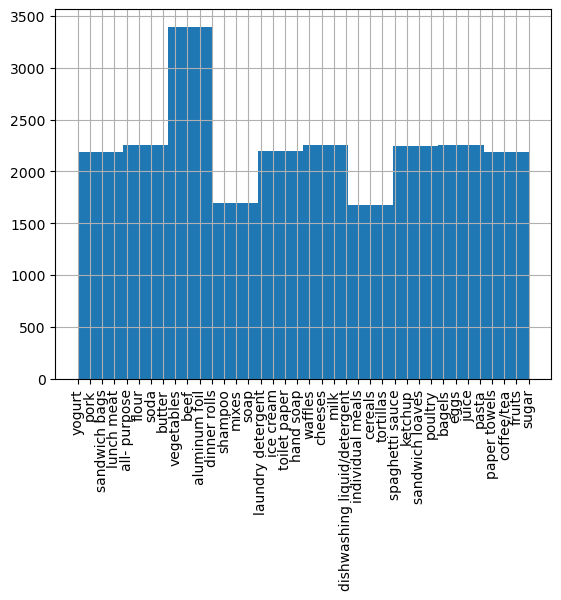

In [ ]:
# Check product demand
df['Product'].hist(xrot=90)

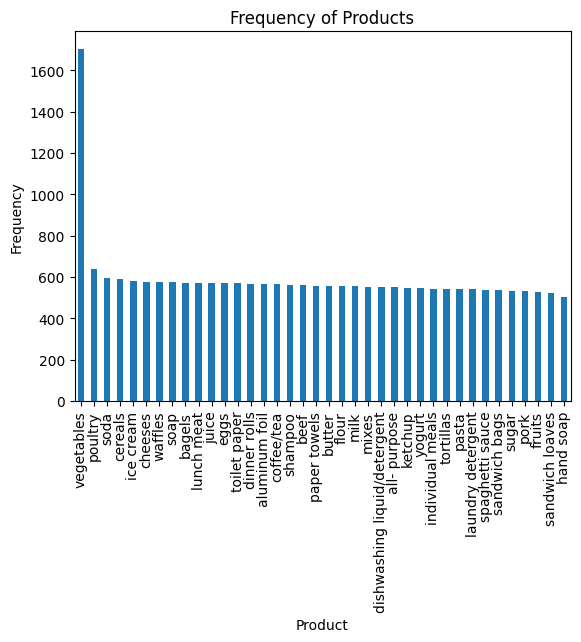

In [ ]:
# Calculate value counts. Visualization for categorical data to get the frequency of each category 'Product'
product_counts = df['Product'].value_counts()

# Plot bar chart
product_counts.plot(kind='bar', rot=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency of Products')
plt.show()

In [ ]:
print(""" The Visual above has identified that VEGETABLES is the product in highest demand as depicted on the frequency chart.
  Other products are showing a almost flat demand levels. HAND SOAP is the least purchased product""" )

 The Visual above has identified that VEGETABLES is the product in highest demand as depicted on the frequency chart.
  Other products are showing a almost flat demand levels. HAND SOAP is the least purchased product


In [ ]:
# Below is a tabular representation of the graph above. An Inventory Analysis
# Showing the product list by number of items purchased, in descending order of demand to detect trends (identify most popular products)
# It cleary shows the product with the highest demand and the product with the least demand in the Inventory
df['Product'].value_counts()

Product
vegetables                      1702
poultry                          640
soda                             597
cereals                          591
ice cream                        579
cheeses                          578
waffles                          575
soap                             574
bagels                           573
lunch meat                       573
juice                            570
eggs                             570
toilet paper                     569
dinner rolls                     567
aluminum foil                    566
coffee/tea                       565
shampoo                          562
beef                             561
paper towels                     556
butter                           555
flour                            555
milk                             555
mixes                            554
dishwashing liquid/detergent     551
all- purpose                     551
ketchup                          548
yogurt                        

In [ ]:
# Check number of transactions. Shows the data for the first five rows and last 5 rows
df['Transaction ID'].value_counts()

Transaction ID
1003    34
226     34
506     34
1013    34
385     34
        ..
70       5
688      5
61       5
667      5
1139     5
Name: count, Length: 1139, dtype: int64

# Data Preprocessing

In [ ]:
# We are going to use Market Basket Analysis (MBA), to associate data of transactions, since the dataset is a list of ungrouped/unassociated data
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# List of products
products = df['Product']


# Group the products by Transaction ID
basket = df.groupby(['Transaction ID'])['Product'].apply(list).tolist()

# Use TransactionEncoder to transform the data into a one-hot encoded format
transaction_encoder = TransactionEncoder()
te_ary = transaction_encoder.fit(basket).transform(basket)
df_group_by_transactions = pd.DataFrame(te_ary, columns=transaction_encoder.columns_)

# Display the first few rows of the transformed data
df_group_by_transactions.head()

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True


In [ ]:
# Encode the transactions. Using Data type int
transaction_encoder = TransactionEncoder()
te_ary = transaction_encoder.fit(basket).transform(basket)
df_group_by_transactions = pd.DataFrame(te_ary, columns=transaction_encoder.columns_, dtype='int')
df_group_by_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,1,1,0,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
1,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,1
2,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1,0,0,1,0,1,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
1135,0,0,0,0,0,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
1136,0,0,1,1,0,0,0,0,1,1,...,1,1,0,0,1,0,1,1,0,1
1137,1,0,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1


## Applying Apriori Algorithm

In [ ]:
# Set minimum support
min_support = 0.05

# Generate frequent itemsets
frequent_itemsets = apriori(df_group_by_transactions, min_support=min_support, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
15744,0.058824,"(sugar, vegetables, waffles, yogurt)"
15745,0.055312,"(toilet paper, vegetables, tortillas, waffles)"
15746,0.053556,"(toilet paper, vegetables, tortillas, yogurt)"
15747,0.064969,"(toilet paper, vegetables, waffles, yogurt)"


In [ ]:
# Set minimum confidence
min_confidence = 0.3

# Generate association rules using confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(aluminum foil),(all- purpose),0.384548,0.374890,0.157155,0.408676,1.090121,0.012992,1.057135,0.134325
1,(all- purpose),(aluminum foil),0.374890,0.384548,0.157155,0.419204,1.090121,0.012992,1.059670,0.132250
2,(bagels),(all- purpose),0.385426,0.374890,0.150132,0.389522,1.039028,0.005639,1.023967,0.061119
3,(all- purpose),(bagels),0.374890,0.385426,0.150132,0.400468,1.039028,0.005639,1.025091,0.060089
4,(beef),(all- purpose),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,0.047719


In [ ]:
# Display association rules -last 5 rows
rules.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74063,"(tortillas, yogurt, waffles)",(vegetables),0.067603,0.739245,0.059701,0.883117,1.194620,0.009726,2.230904,0.174726
74064,"(vegetables, yogurt, waffles)",(tortillas),0.146620,0.369622,0.059701,0.407186,1.101626,0.005508,1.063364,0.108100
74065,"(tortillas, waffles)","(vegetables, yogurt)",0.149254,0.319579,0.059701,0.400000,1.251648,0.012003,1.134036,0.236326
74066,"(tortillas, yogurt)","(vegetables, waffles)",0.152766,0.315189,0.059701,0.390805,1.239907,0.011551,1.124124,0.228375
74067,"(yogurt, waffles)","(tortillas, vegetables)",0.173837,0.283582,0.059701,0.343434,1.211058,0.010405,1.091160,0.210946


In [ ]:


# Generate association rules using lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)
# Display association rules
print("Association Rules:")
rules

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(aluminum foil),(all- purpose),0.384548,0.374890,0.157155,0.408676,1.090121,0.012992,1.057135,0.134325
1,(all- purpose),(aluminum foil),0.374890,0.384548,0.157155,0.419204,1.090121,0.012992,1.059670,0.132250
2,(bagels),(all- purpose),0.385426,0.374890,0.150132,0.389522,1.039028,0.005639,1.023967,0.061119
3,(all- purpose),(bagels),0.374890,0.385426,0.150132,0.400468,1.039028,0.005639,1.025091,0.060089
4,(beef),(all- purpose),0.374890,0.374890,0.144864,0.386417,1.030747,0.004321,1.018786,0.047719
...,...,...,...,...,...,...,...,...,...,...
144297,"(yogurt, waffles)","(tortillas, vegetables)",0.173837,0.283582,0.059701,0.343434,1.211058,0.010405,1.091160,0.210946
144298,(tortillas),"(vegetables, yogurt, waffles)",0.369622,0.146620,0.059701,0.161520,1.101626,0.005508,1.017771,0.146342
144299,(vegetables),"(tortillas, yogurt, waffles)",0.739245,0.067603,0.059701,0.080760,1.194620,0.009726,1.014313,0.624777
144300,(waffles),"(tortillas, vegetables, yogurt)",0.394205,0.130817,0.059701,0.151448,1.157711,0.008133,1.024313,0.224872


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


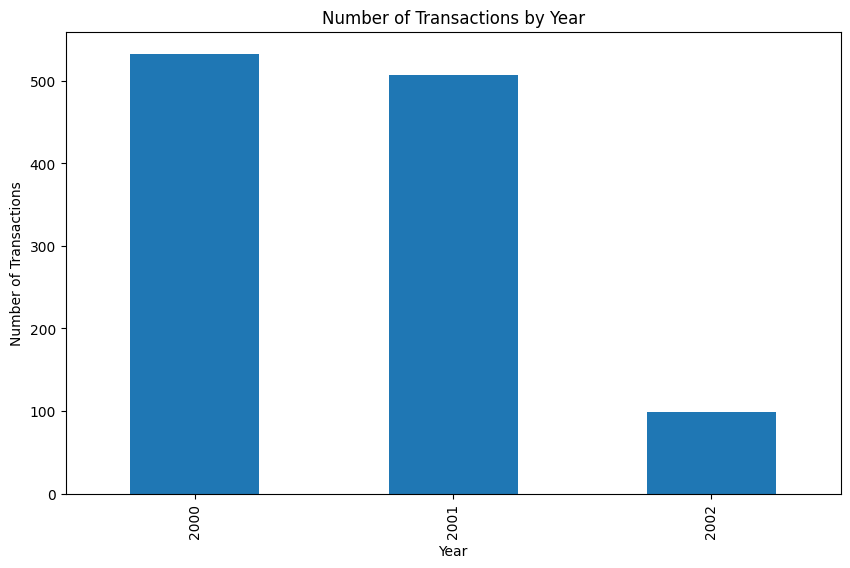

In [ ]:
# Creating chart to see transactions per year
df['Year'] = df['Date'].dt.year


# Count transactions by year
transactions_per_year = df.groupby('Year')['Transaction ID'].nunique()

#Creating a bar plot
plt.figure(figsize=(10, 6))
transactions_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Year')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


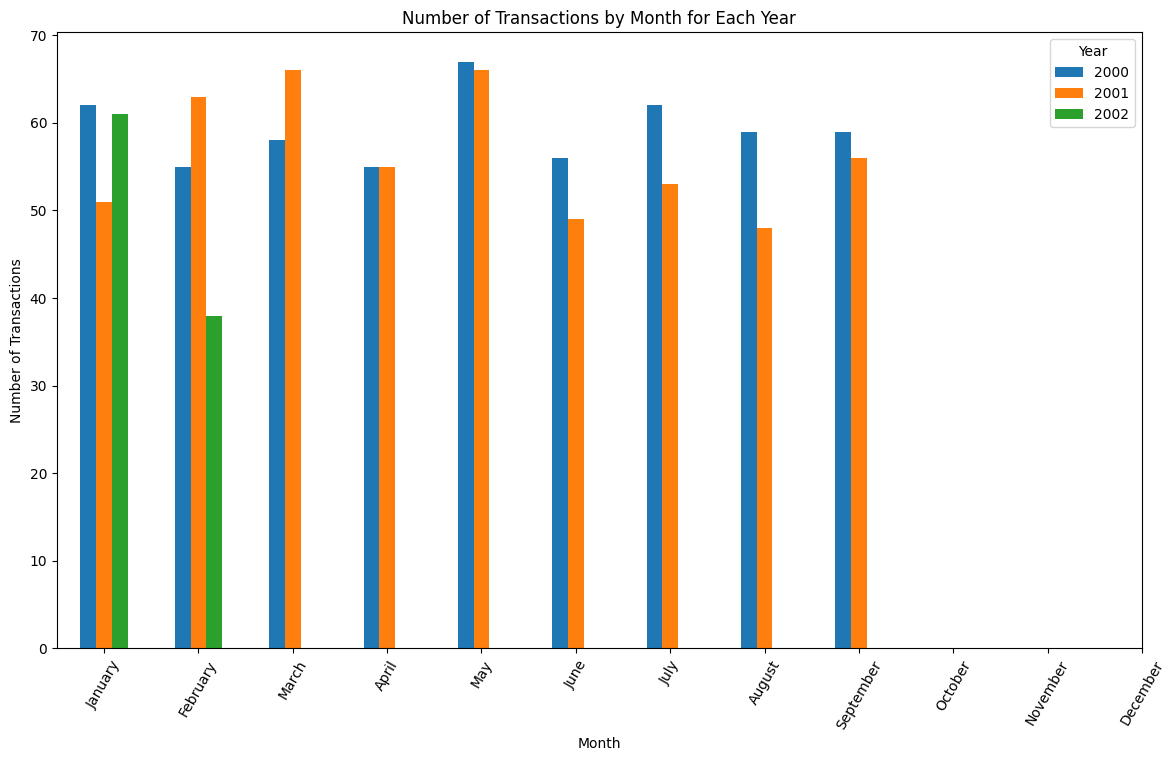

In [ ]:
# Extract the year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Count the number of transactions per month for each year
transactions_per_month_year = df.groupby(['Year', 'Month'])['Transaction ID'].nunique().unstack(level=0)

# Define month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Plot the data
ax = transactions_per_month_year.plot(kind='bar', figsize=(14, 8))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Month for Each Year')
ax.legend(title='Year')

# Set month labels on x-axis
ax.set_xticks(range(len(month_labels)))
ax.set_xticklabels(month_labels, rotation=60)

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


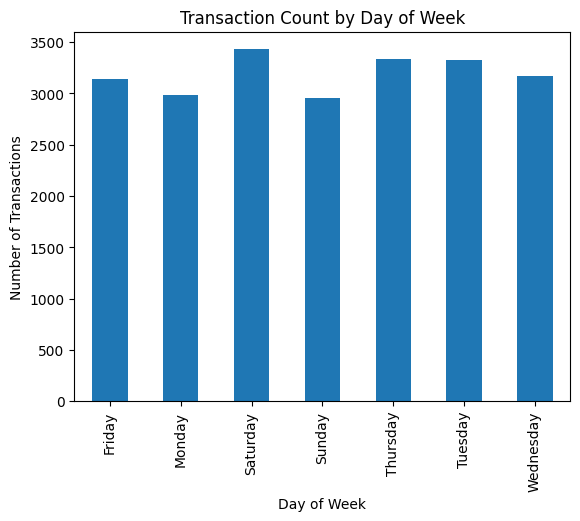

In [ ]:
# Creating new column 'DayOfWeek' extracting day from the 'Date' column using day_name() method
df['DayOfWeek'] = df['Date'].dt.day_name()


# Count transactions by day of week
day_counts = df['DayOfWeek'].value_counts().sort_index()

#Creating a bar plot of day_counts data
day_counts.plot(kind='bar')
plt.title('Transaction Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

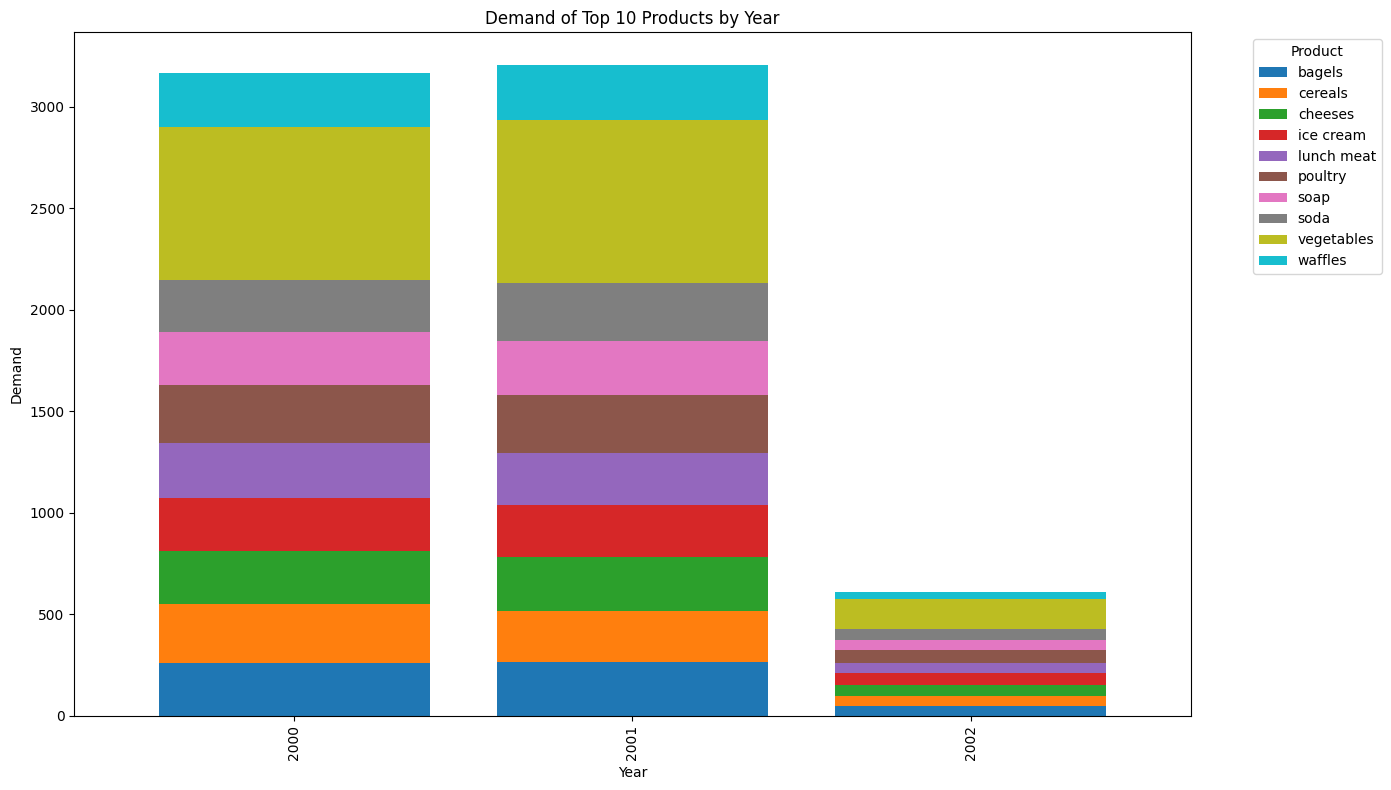

In [ ]:
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Determine the top 10 products overall
top_products = df['Product'].value_counts().nlargest(10).index

# Filter data to include only the top 10 products
top_product_data = df[df['Product'].isin(top_products)]

# Group by year and product, then count the occurrences
top_product_demand_by_year = top_product_data.groupby(['Year', 'Product']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
top_product_demand_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel('Year')
plt.ylabel('Demand')
plt.title('Demand of Top 10 Products by Year')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

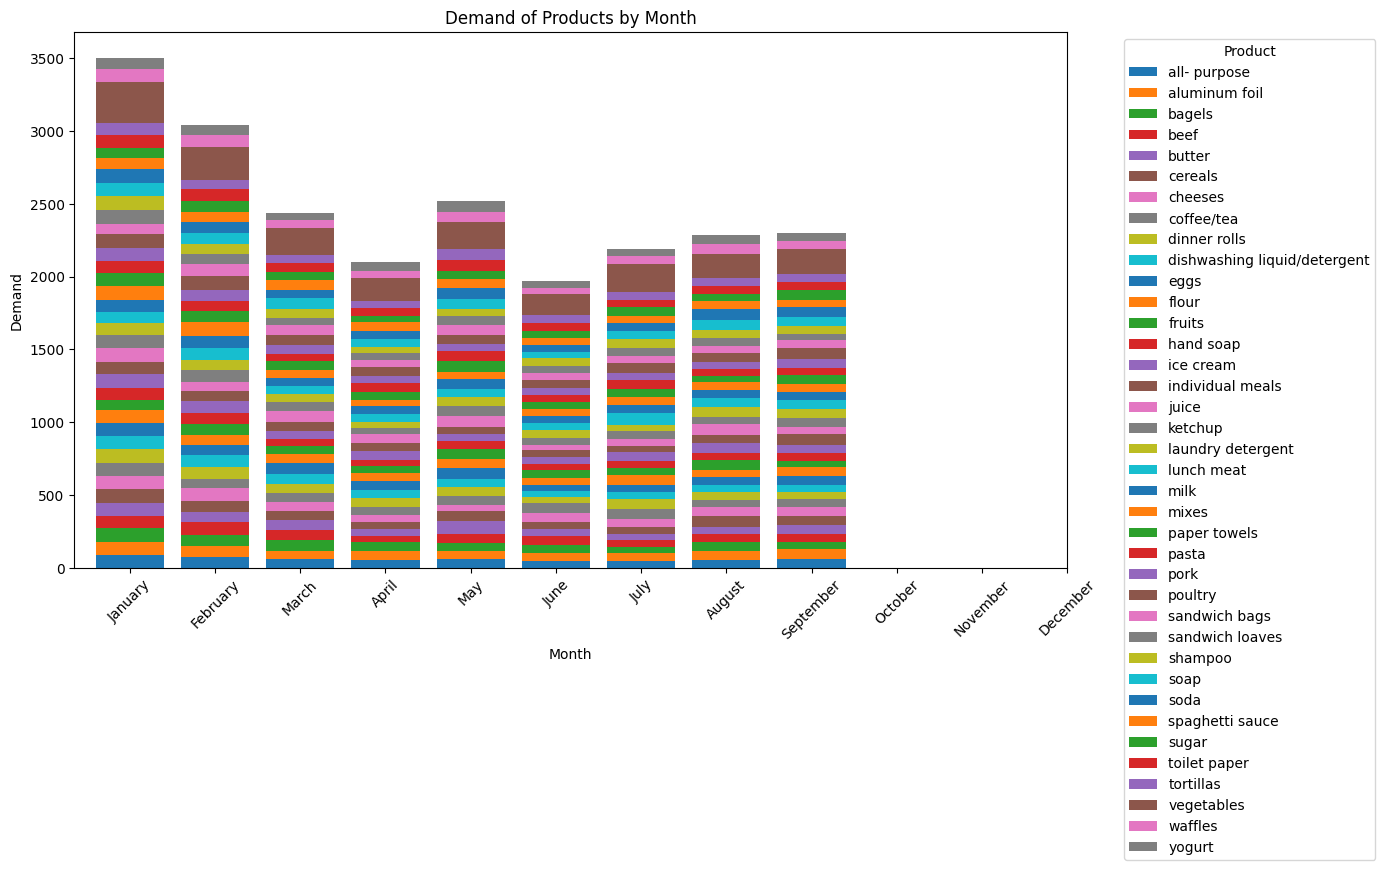

In [ ]:
# Calculate demand ofg products by Month
df['Month'] = df['Date'].dt.month

# Month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group by month and product
product_demand_by_month = df.groupby(['Month', 'Product']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
product_demand_by_month.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand of Products by Month')
plt.xticks(range(12), month_labels, rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1400x800 with 0 Axes>

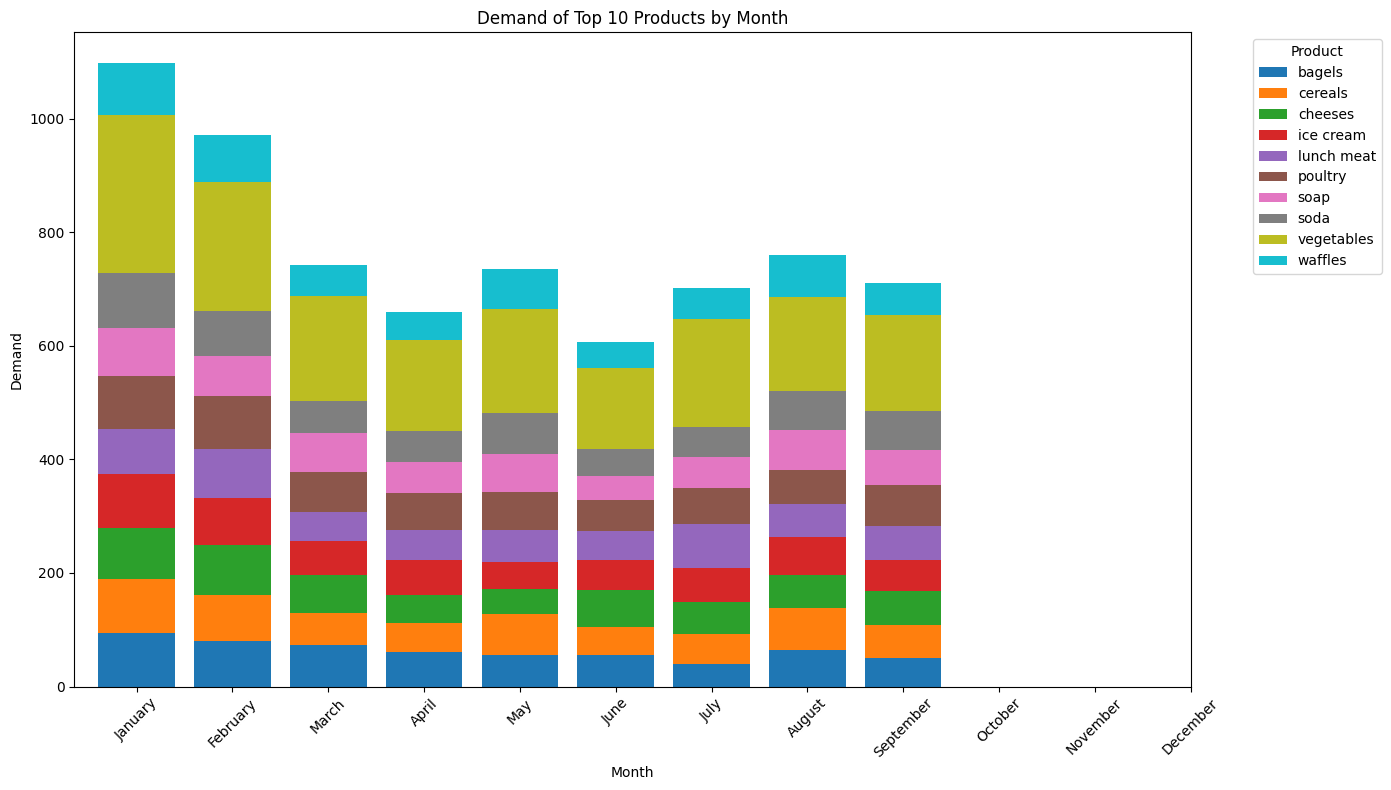

In [ ]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Define full month labels
month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Determine the top 10 products overall
top_products = df['Product'].value_counts().nlargest(10).index

# Filter data to include only the top 10 products
top_product_data = df[df['Product'].isin(top_products)]

# Group by month and product, then count the occurrences
top_product_demand_by_month = top_product_data.groupby(['Month', 'Product']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
top_product_demand_by_month.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand of Top 10 Products by Month')
plt.xticks(range(12), month_labels, rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analyzing Product Categories

In [ ]:
# Finding the distinct products
Products = df['Product'].unique()
Products

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'vegetables', 'beef', 'aluminum foil',
       'dinner rolls', 'shampoo', 'mixes', 'soap', 'laundry detergent',
       'ice cream', 'toilet paper', 'hand soap', 'waffles', 'cheeses',
       'milk', 'dishwashing liquid/detergent', 'individual meals',
       'cereals', 'tortillas', 'spaghetti sauce', 'ketchup',
       'sandwich loaves', 'poultry', 'bagels', 'eggs', 'juice', 'pasta',
       'paper towels', 'coffee/tea', 'fruits', 'sugar'], dtype=object)

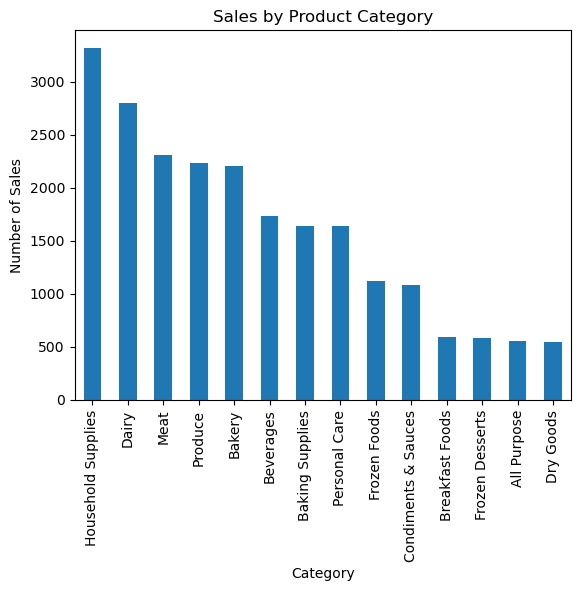

In [ ]:
# Creating a dictionary that maps the products to categories
category_mapping = {'yogurt': 'Dairy', 'pork': 'Meat', 'sandwich bags':'Household Supplies', 'lunch meat': 'Meat', 'all- purpose':'All Purpose',
       'flour': 'Baking Supplies', 'soda': 'Beverages', 'butter': 'Dairy', 'vegetables': 'Produce', 'beef': 'Meat', 'aluminum foil': 'Household Supplies',
       'dinner rolls': 'Bakery', 'shampoo': 'Personal Care', 'mixes': 'Baking Supplies', 'soap': 'Personal Care', 'laundry detergent': 'Household Supplies',
       'ice cream': 'Frozen Desserts', 'toilet paper': 'Household Supplies', 'hand soap': 'Personal Care', 'waffles': 'Frozen Foods', 'cheeses': 'Dairy',
       'milk': 'Dairy', 'dishwashing liquid/detergent': 'Household Supplies', 'individual meals': 'Frozen Foods',
       'cereals': 'Breakfast Foods', 'tortillas': 'Bakery', 'spaghetti sauce': 'Condiments & Sauces', 'ketchup': 'Condiments & Sauces',
       'sandwich loaves': 'Bakery', 'poultry': 'Meat', 'bagels': 'Bakery', 'eggs': 'Dairy', 'juice': 'Beverages', 'pasta': 'Dry Goods',
       'paper towels': 'Household Supplies', 'coffee/tea': 'Beverages', 'fruits': 'Produce', 'sugar': 'Baking Supplies'}

df['Category'] = df['Product'].map(category_mapping)

category_counts = df['Category'].value_counts()

category_counts.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
# Displaying the most common product categories
print("Top product categories:", ", ".join(category_counts.index[:4]))

Top product categories: Household Supplies, Dairy, Meat, Produce


In [ ]:
# Questions:
# General review so far
# 1) Explanation about the parameters for association rules (support, confidence)
# 2) Based on this problem, what kind of model is appropiate (Regression, Classification)
# 3) Market Basket Analysis (MBA) it is machine learning model, (frequent items, product trends, products associations, dates with more demand, top products by season)?

In [ ]:
# Questions:
# General review so far
# 1) We have run the association models but need more clarity on the parameters used (support, confidence). What guidance can he provide as it
# appears the thresholds applied (0.05 and 0.01) is returning a whole lot of data.
# 2)Based on this problem, what kind of model is appropiate to apply (Regression, Classification)
# 3) We also want to apply time series analysis on the data but we are yet to cover.
# 4) We need guidance on how to arrive at the final validation step with the results obtained so far on the association rules/frequent itemsets.
# Guidance on charts and models to use to display final recommendations and conclusion.